# Exploratory Analysis

This notebook contains quick exploratory steps for the OBIS Indian Ocean dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clean data
df = pd.read_csv('../data/processed/cleaned_obis_data.csv')

# Display the first 5 rows
print("First 5 rows of the data:")
print(df.head())

# Get a summary of the dataframe (columns, data types, non-null counts)
print("\nData summary:")
df.info()

First 5 rows of the data:
                     species  decimalLatitude  decimalLongitude  \
0        Namalycastis abiuma        10.000000         95.000000   
1        Engraulis eurystole        33.000000         77.000000   
2   Evolvocassidulina bradyi         9.029200         72.877800   
3       Mutilus pentoekensis        12.116667         75.138056   
4  Clausocalanus arcuicornis        19.366700         69.116700   

              eventDate             scientificName        phylum  \
0  1872-07-02T00:00:00Z        Namalycastis abiuma      Annelida   
1            1977-10-05        Engraulis eurystole      Chordata   
2            1972-03-10   Evolvocassidulina bradyi  Foraminifera   
3                  2007       Mutilus pentoekensis    Arthropoda   
4  1976-10-10T05:00:00Z  Clausocalanus arcuicornis    Arthropoda   

           class         order             family              genus  
0     Polychaeta  Phyllodocida         Nereididae       Namalycastis  
1      Teleostei  Cl

Top 20 most common species:
species
Paracalanus aculeatus        117
Clausocalanus arcuicornis    108
Microsetella rosea           102
Subeucalanus subcrassus       69
Euchaeta concinna             66
Paracalanus parvus            54
Lucicutia flavicornis         54
Pseudanchialina pusilla       51
Ferosagitta robusta           48
Conchoecetta giesbrechti      45
Macrosetella gracilis         45
Nannocalanus minor            45
Metaconchoecia rotundata      42
Platanista gangetica          42
Aidanosagitta regularis       42
Acrocalanus gibber            42
Flaccisagitta hexaptera       39
Pleuromamma indica            36
Proceroecia procera           36
Serratosagitta pacifica       36
Name: count, dtype: int64


C:\Users\Arghojit\AppData\Local\Temp\ipykernel_5784\354218638.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.head(10).values, y=species_counts.head(10).index, palette='viridis')


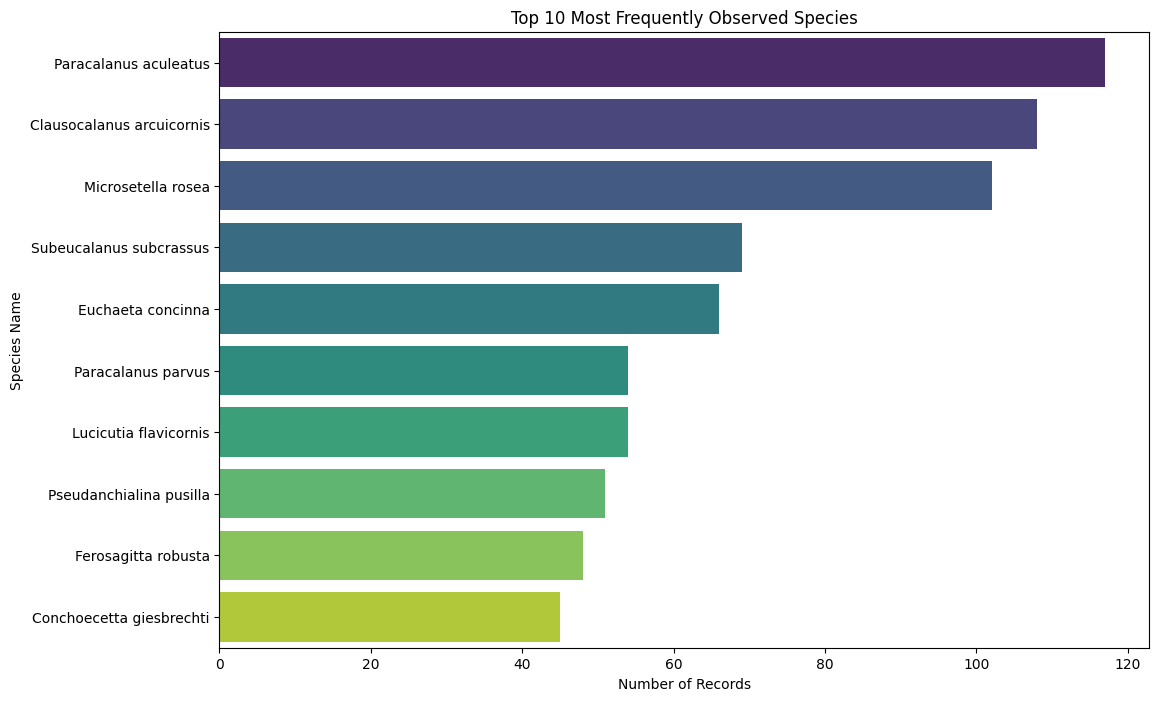

In [2]:
# Get the counts of each species
species_counts = df['species'].value_counts()

print("Top 20 most common species:")
print(species_counts.head(20))

# Plot the top 10
plt.figure(figsize=(12, 8))
sns.barplot(x=species_counts.head(10).values, y=species_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Frequently Observed Species')
plt.xlabel('Number of Records')
plt.ylabel('Species Name')
plt.show()

Number of records per Phylum:
phylum
Arthropoda          2844
Chordata            2769
Mollusca            1179
Annelida             729
Foraminifera         627
Cnidaria             411
Chaetognatha         405
Echinodermata        360
Heterokontophyta     243
Rhodophyta           231
Name: count, dtype: int64


C:\Users\Arghojit\AppData\Local\Temp\ipykernel_5784\1209527577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phylum_counts.head(10).values, y=phylum_counts.head(10).index, palette='plasma')


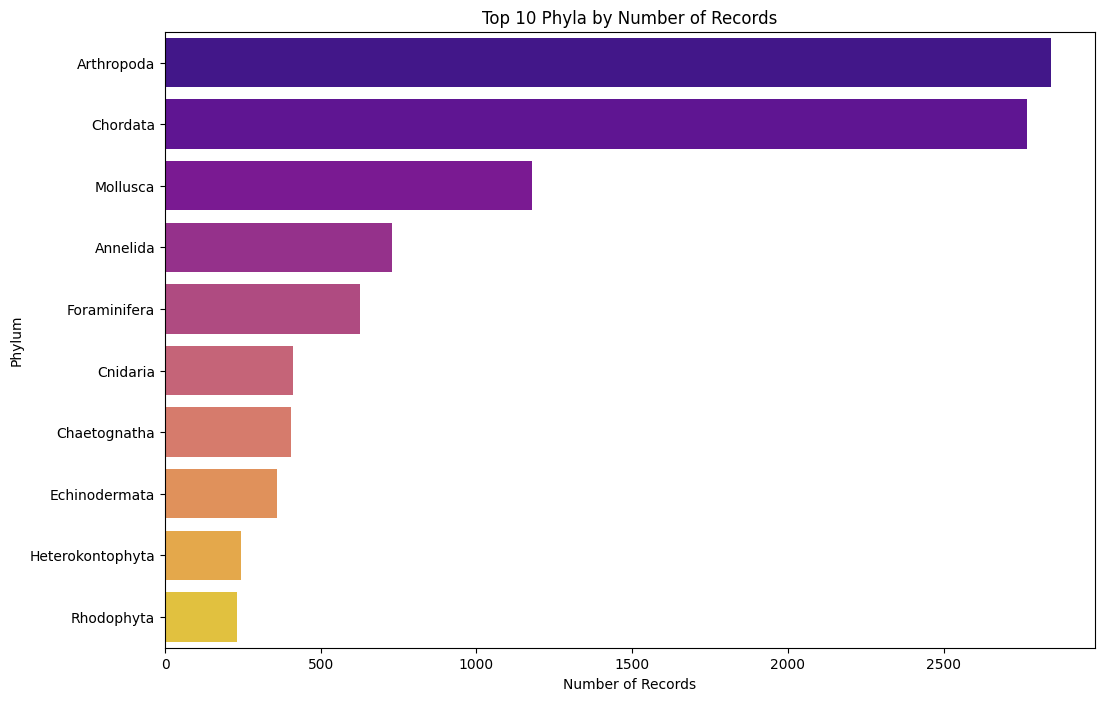

In [3]:
# Get the counts for each phylum
phylum_counts = df['phylum'].value_counts()

print("Number of records per Phylum:")
print(phylum_counts.head(10))

# Plot the top 10 phyla
plt.figure(figsize=(12, 8))
sns.barplot(x=phylum_counts.head(10).values, y=phylum_counts.head(10).index, palette='plasma')
plt.title('Top 10 Phyla by Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Phylum')
plt.show()

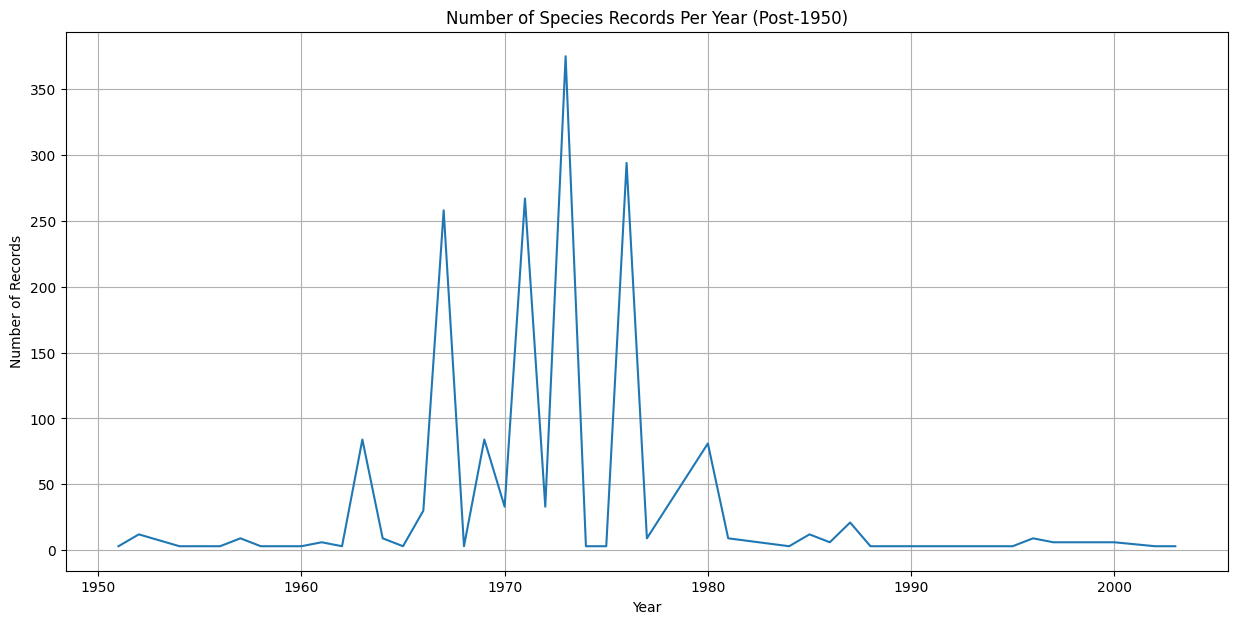

In [4]:
# Convert 'eventDate' to datetime objects (ignoring errors for now)
df['year'] = pd.to_datetime(df['eventDate'], errors='coerce').dt.year

# Count records per year
yearly_counts = df['year'].value_counts().sort_index()

# Plot records over time (e.g., for years after 1950)
plt.figure(figsize=(15, 7))
yearly_counts[yearly_counts.index > 1950].plot(kind='line')
plt.title('Number of Species Records Per Year (Post-1950)')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()